In [128]:
import torch as th
import matplotlib.pyplot as plt
import seaborn as sns
from trainer import ema
sns.set_context('poster')
sns.set_style('dark')
#sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.7))

In [129]:
from glob import glob
resnet_trainers = []
for t_path in glob('saved/RESNET*/**/trainer', recursive=True):
    print('load ', t_path)
    resnet_trainers.append(th.load(t_path))

load  saved/RESNET-K4N1-selu-sgd/0001/trainer
load  saved/RESNET-K4N1-relu-adam/0001/trainer
load  saved/RESNET-K4N1-selu-adam/0001/trainer
load  saved/RESNET-K4N1-relu-sgd/0001/trainer
load  saved/RESNET-halved-K4N1-selu-adam/0001/trainer
load  saved/RESNET-quarter-K4N1-selu-adam/0001/trainer


In [130]:
from glob import glob
resnet_trainers = [
    th.load('saved/RESNET-K4N1-selu-adam/0001/trainer'),
    th.load('saved/RESNET-K4N1-relu-adam/0001/trainer'),
    th.load('saved/RESNET-K4N1-selu-sgd/0001/trainer'),
    th.load('saved/RESNET-K4N1-relu-sgd/0001/trainer'),
    th.load('saved/RESNET-halved-K4N1-selu-adam/0001/trainer'),
    th.load('saved/RESNET-quarter-K4N1-selu-adam/0001/trainer'),
    th.load('saved/ADAM-SELU-16-double/0003/trainer'),
    th.load('saved/ADAM-RELU-16-double/0003/trainer'),
]

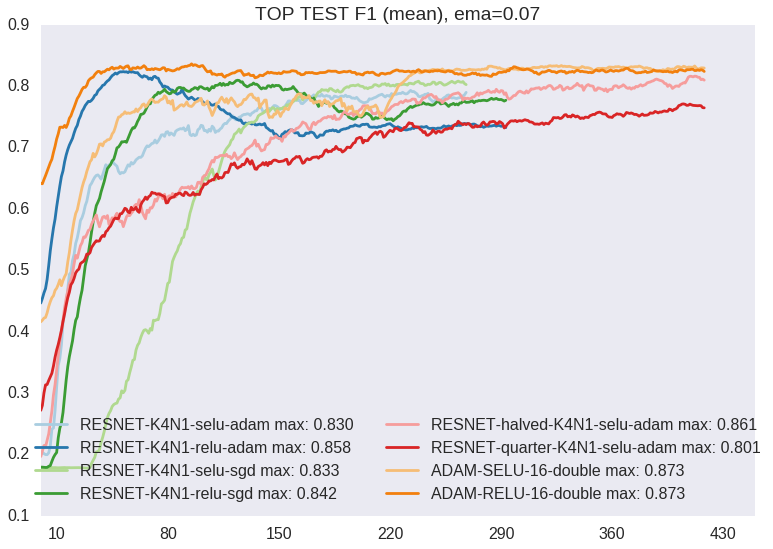

In [131]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Paired", n_colors=14, desat=.9))
def add_plot(T, alpha=0.1):
    plt.plot(ema(th.cat(T.test_F1)[:, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (mean), ema=0.07')
for T in resnet_trainers:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

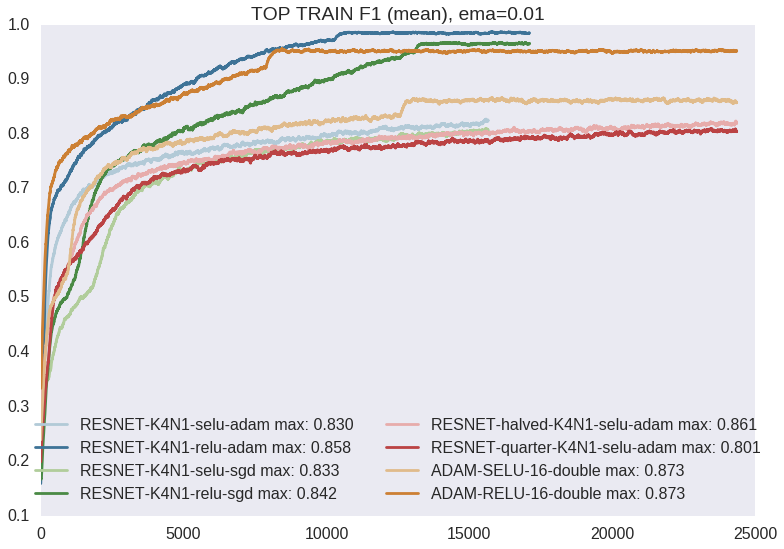

In [132]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Paired", n_colors=14, desat=.6))
def add_plot(T, alpha=0.01):
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TRAIN F1 (mean), ema=0.01')
for T in resnet_trainers:
    add_plot(T)
#plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

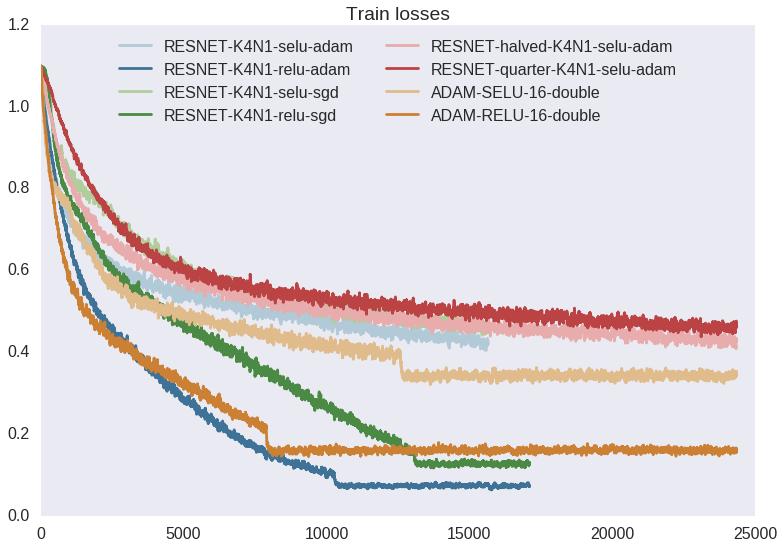

In [133]:
def add_plot(T, alpha=0.05):
    sns.set_palette(sns.color_palette("Paired", n_colors=8))
    plt.plot(ema(T.losses, alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Train losses')
for T in resnet_trainers:
    add_plot(T)
plt.legend(loc='upper center', ncol=2)
plt.show()

In [134]:
from glob import glob
all_trainers = []
for t_path in glob('saved/**/trainer', recursive=True):
    print('load ', t_path)
    all_trainers.append(th.load(t_path))

load  saved/SGD-dilvgg-nodense/0001/trainer
load  saved/SGD-dilvgg/0001/trainer
load  saved/SGD-halved-dilvgg-nodense/0001/trainer
load  saved/ADAM-dilvgg-nodense/0001/trainer
load  saved/SGD-halved-dilvgg/0001/trainer
load  saved/ADAM-dilvgg/0001/trainer
load  saved/ADAM-halved-dilvgg-nodense/0001/trainer
load  saved/ADAM-halved-dilvgg/0001/trainer
load  saved/RELU-19/0001/trainer
load  saved/RELU-19-halved/0001/trainer
load  saved/RELU-19-halved/0003/trainer
load  saved/RELU-16-double/0001/trainer
load  saved/RELU-16-quart/0001/trainer
load  saved/SELU-19/0001/trainer
load  saved/SELU-19-halved/0001/trainer
load  saved/SELU-16-double/0001/trainer
load  saved/SELU-16-quart/0001/trainer
load  saved/ADAM-SELU-16-quart/0001/trainer
load  saved/ADAM-SELU-16-quart/0003/trainer
load  saved/ADAM-RELU-19-halved/0001/trainer
load  saved/ADAM-RELU-19-halved/0003/trainer
load  saved/ADAM-SELU-19-halved/0001/trainer
load  saved/ADAM-SELU-19-halved/0003/trainer
load  saved/ADAM-RELU-16-quart/0001/

In [135]:
all_trainers.sort(key=lambda x: -x.test_highscore)
for i, T in enumerate(all_trainers, 1):
    print(i, '%.4f @ %3d'%(T.test_highscore, T.highscore_epoch), T.path, sep='\t')
    

1	0.8874 @  93	saved/SGD-dilvgg-nodense/0001
2	0.8871 @  51	saved/ADAM-halved-dilvgg/0001
3	0.8770 @ 331	saved/ADAM-SELU-19-halved/0003
4	0.8761 @ 422	saved/ADAM-dilvgg-nodense/0001
5	0.8732 @  31	saved/ADAM-RELU-16-double/0003
6	0.8731 @ 283	saved/ADAM-SELU-16-double/0003
7	0.8710 @  64	saved/ADAM-RELU-19-halved/0001
8	0.8649 @  79	saved/ADAM-RELU-19/0003
9	0.8633 @  86	saved/ADAM-halved-dilvgg-nodense/0001
10	0.8633 @ 142	saved/SGD-halved-dilvgg-nodense/0001
11	0.8611 @ 409	saved/RESNET-halved-K4N1-selu-adam/0001
12	0.8579 @ 105	saved/ADAM-SELU-19/0001
13	0.8578 @  72	saved/RESNET-K4N1-relu-adam/0001
14	0.8559 @ 112	saved/SELU-16-double/0001
15	0.8542 @  73	saved/ADAM-RELU-19/0001
16	0.8536 @  42	saved/ADAM-RELU-16-double/0001
17	0.8526 @ 189	saved/ADAM-SELU-16-quart/0003
18	0.8476 @ 118	saved/ADAM-SELU-16-quart/0001
19	0.8475 @  79	saved/ADAM-RELU-19-halved/0003
20	0.8472 @ 128	saved/SGD-dilvgg/0001
21	0.8423 @ 120	saved/RESNET-K4N1-relu-sgd/0001
22	0.8421 @ 122	saved/SELU-19/0001
2

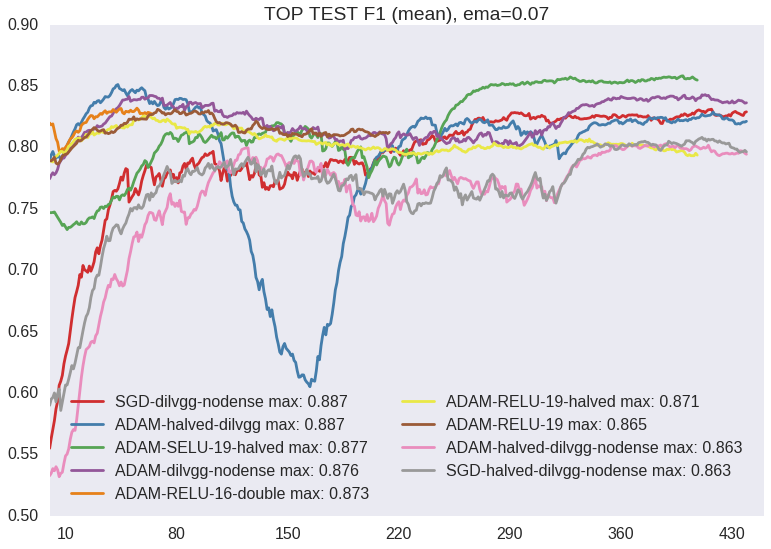

In [10]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.07):
    plt.plot(ema(th.cat(T.test_F1)[10:450, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (mean), ema=0.07')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

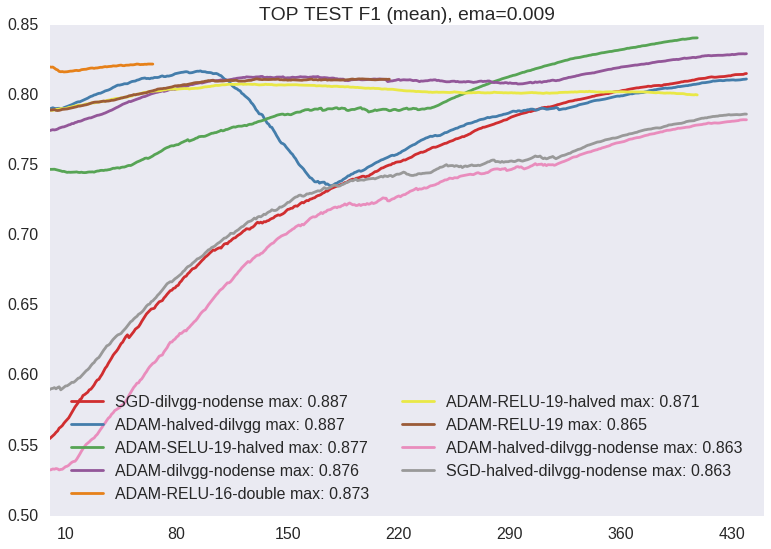

In [14]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.009):
    plt.plot(ema(th.cat(T.test_F1)[10:450, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (mean), ema=0.009')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

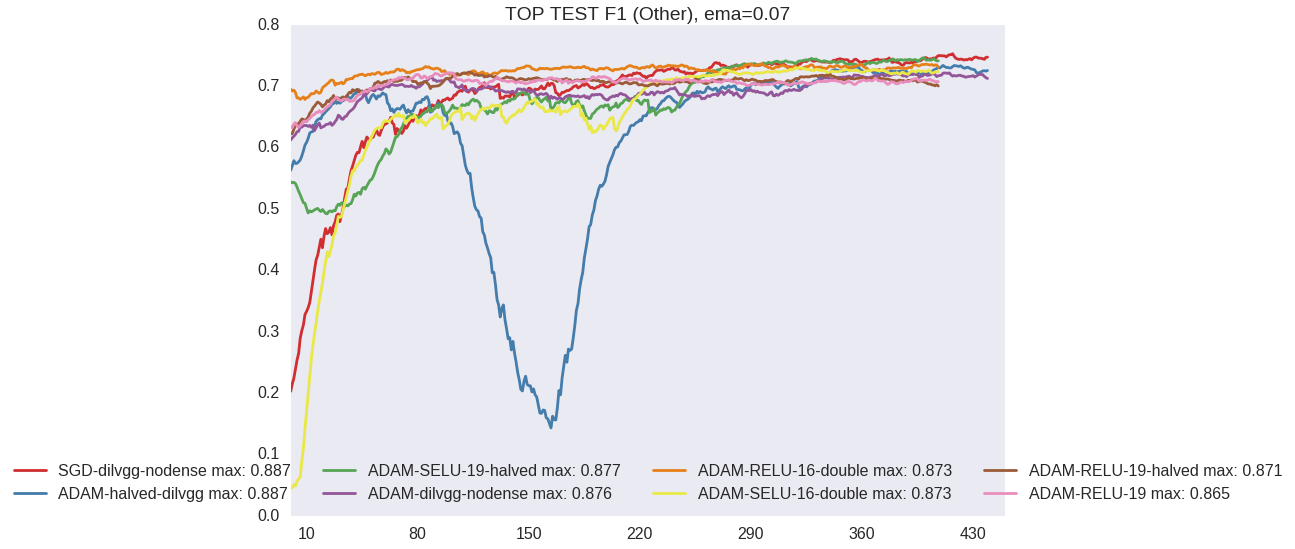

In [136]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.07):
    plt.plot(ema(th.cat(T.test_F1)[10:450, 2], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (Other), ema=0.07')
for T in all_trainers[:8]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=4)
plt.show()

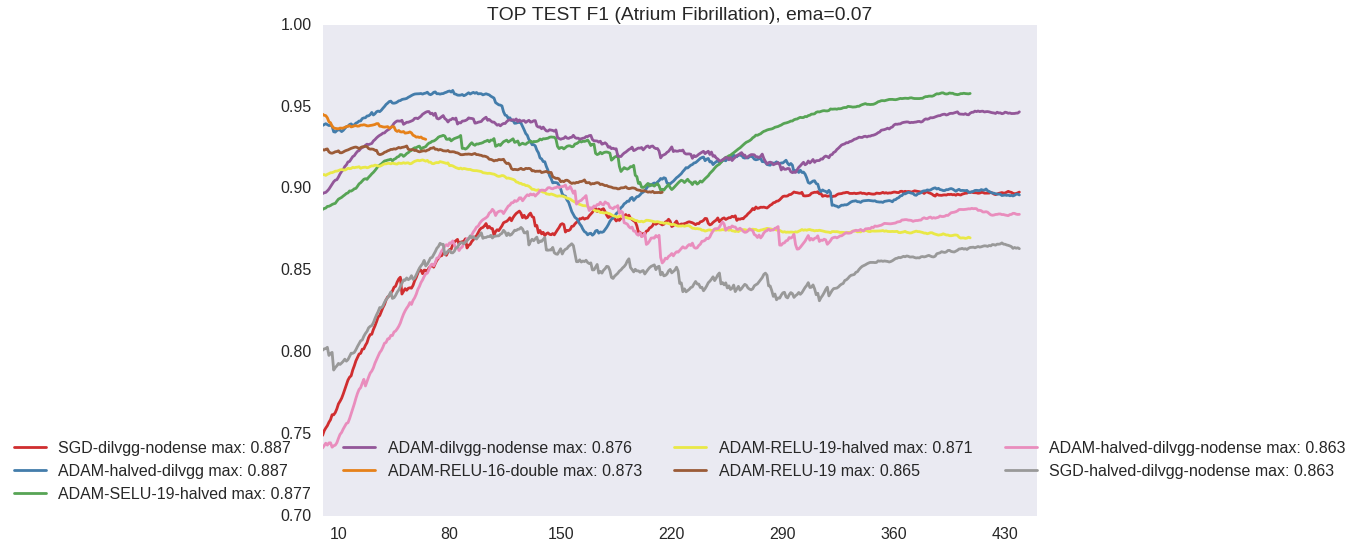

In [20]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.02):
    plt.plot(ema(th.cat(T.test_F1)[10:450, 1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (Atrium Fibrillation), ema=0.07')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=4)
plt.show()

In [90]:
trial = 3
A = th.load('saved/ADAM-SELU-16-double/%04d/trainer'%trial)
B = th.load('saved/ADAM-RELU-16-double/%04d/trainer'%trial)
C = th.load('saved/ADAM-SELU-19-halved/%04d/trainer'%trial)
D = th.load('saved/ADAM-RELU-19-halved/%04d/trainer'%trial)
E = th.load('saved/ADAM-SELU-16-quart/%04d/trainer'%trial)
F = th.load('saved/ADAM-RELU-16-quart/%04d/trainer'%trial)
G = th.load('saved/ADAM-SELU-19/%04d/trainer'%trial)
H = th.load('saved/ADAM-RELU-19/%04d/trainer'%trial)

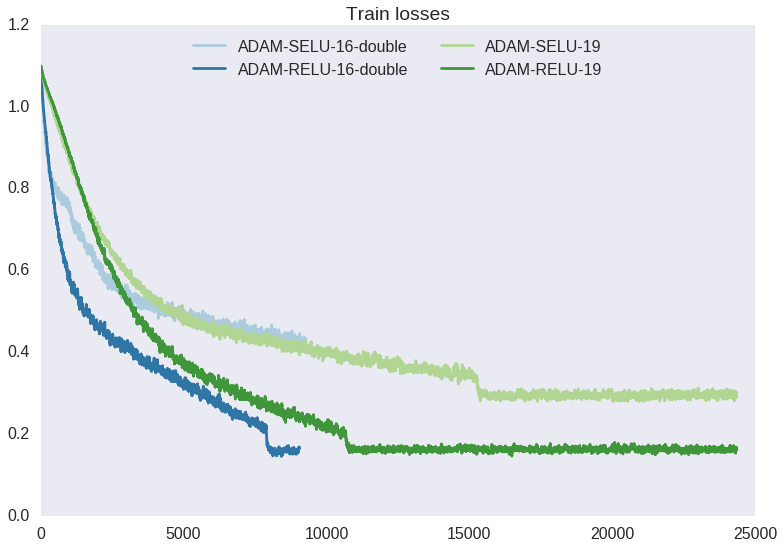

In [91]:
def add_plot(T, alpha=0.05):
    sns.set_palette(sns.color_palette("Paired", n_colors=8))
    plt.plot(ema(T.losses, alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Train losses')
for T in A, B, G, H:
    add_plot(T)
plt.legend(loc='upper center', ncol=2)
plt.show()

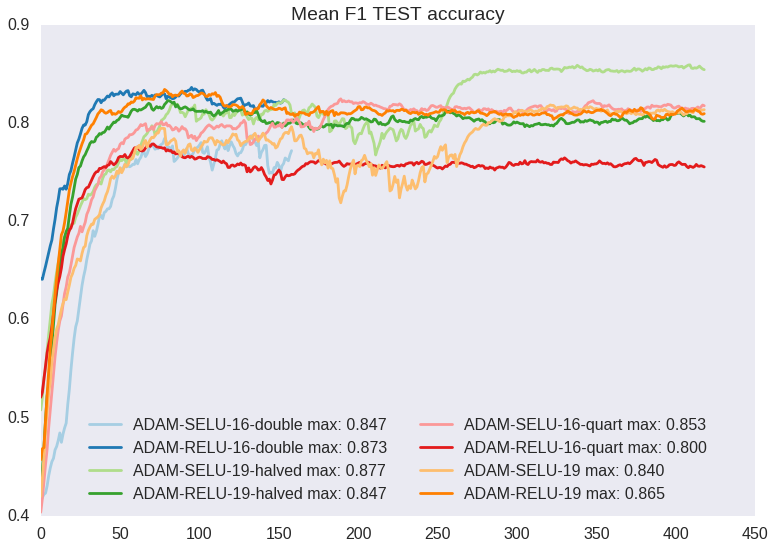

In [92]:
#%matplotlib notebook
def add_plot(T, alpha=0.1):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.5))
    plt.plot(ema(th.cat(T.test_F1)[:, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('Mean F1 TEST accuracy')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

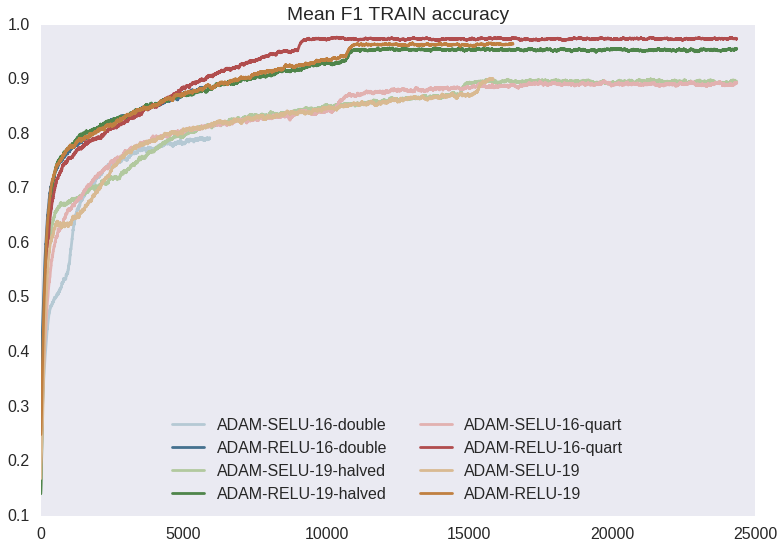

In [45]:
def add_plot(T, alpha=0.01):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.5))
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Mean F1 TRAIN accuracy')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

In [61]:
 th.cat(T.test_F1)[, -2].size()

torch.Size([418])

In [67]:
len(T.train_F1)

24360

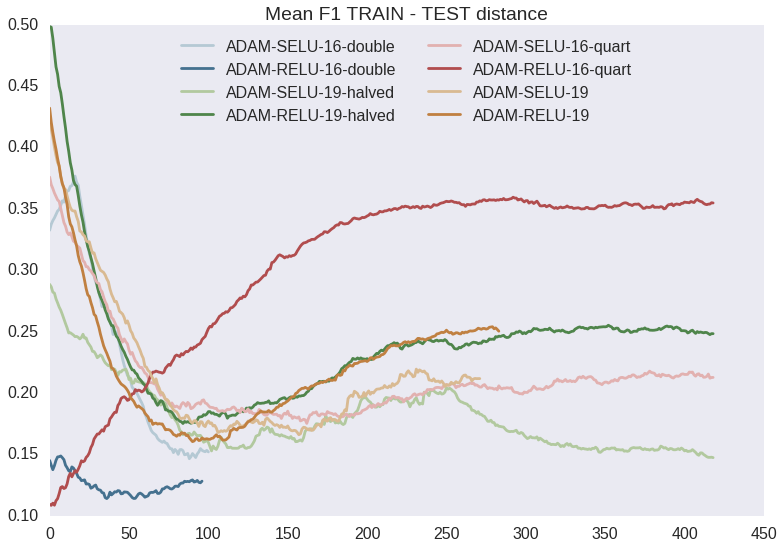

In [82]:
def add_plot(T, alpha=0.03):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.5))
    plt.plot(ema(th.cat(T.train_F1)[57::58, -1][:-1] - th.cat(T.test_F1)[:, -2], alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Mean F1 TRAIN - TEST distance')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='upper center', ncol=2)
plt.show()

In [36]:
def plot(T):
    
    sns.set_palette(sns.color_palette("Set1", n_colors=4, desat=.7))
    plt.close()
    print(T.path)
    f1, f2, f3 = T.plot(.01, .01, .1)
    plt.title('Test accuracy  ' + T.path)
    plt.show()
    return T

saved/ADAM-SELU-16-double/0003


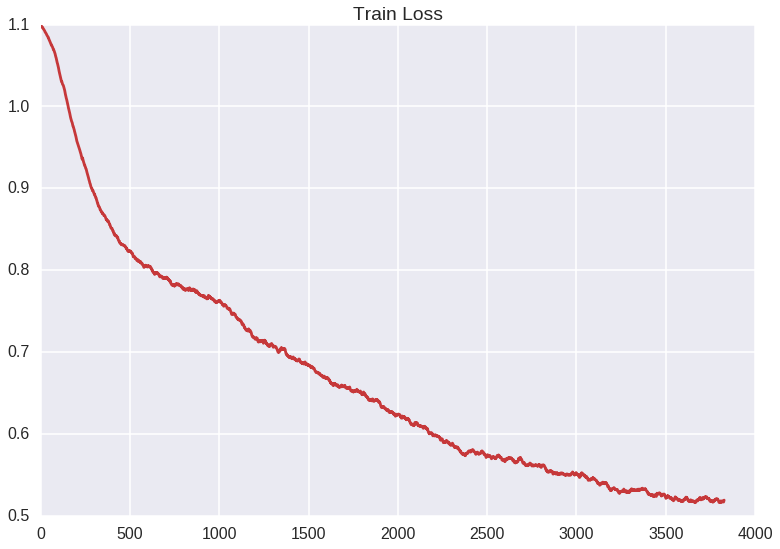

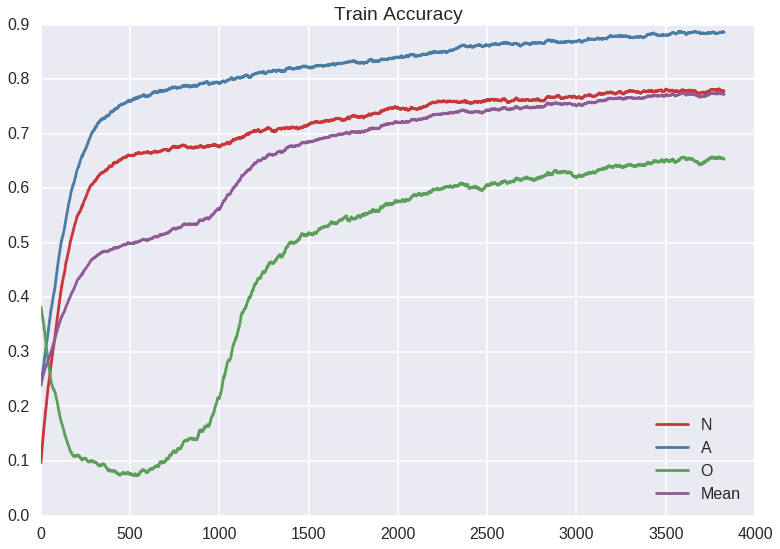

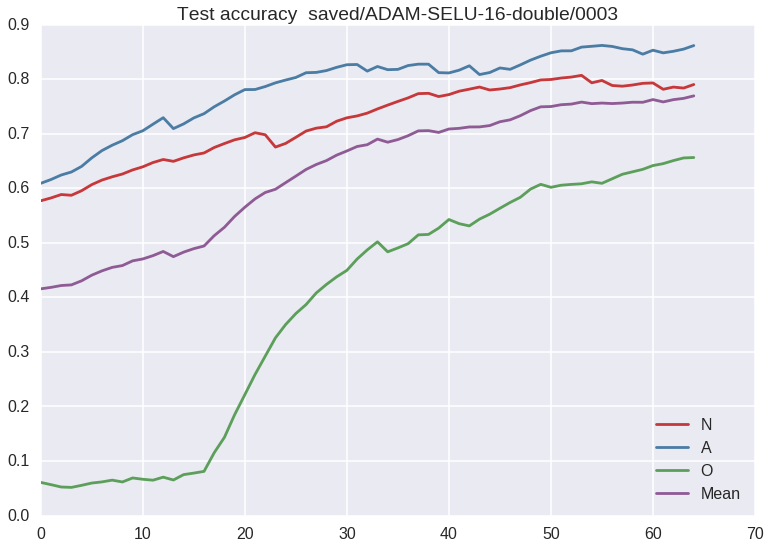

In [150]:
plot(A)
    

saved/ADAM-RELU-16-double/0003


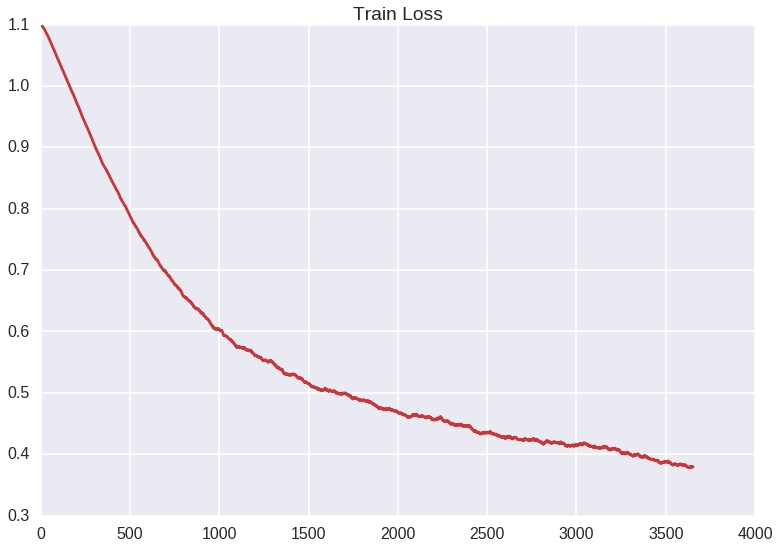

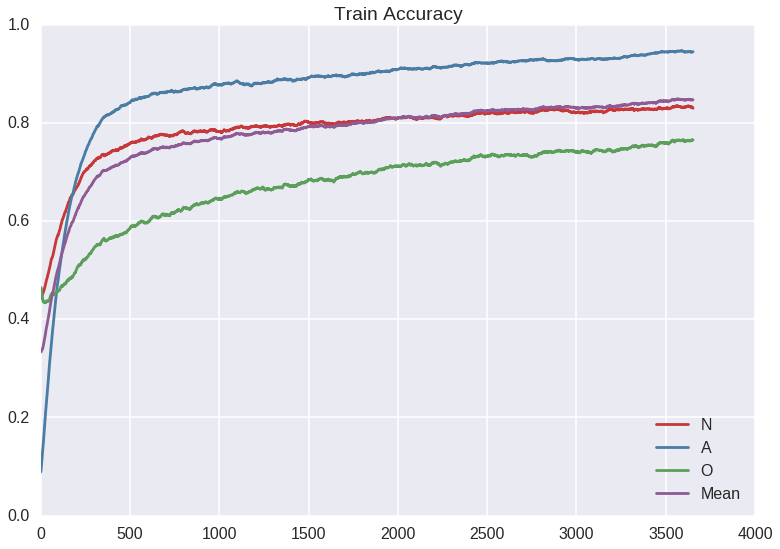

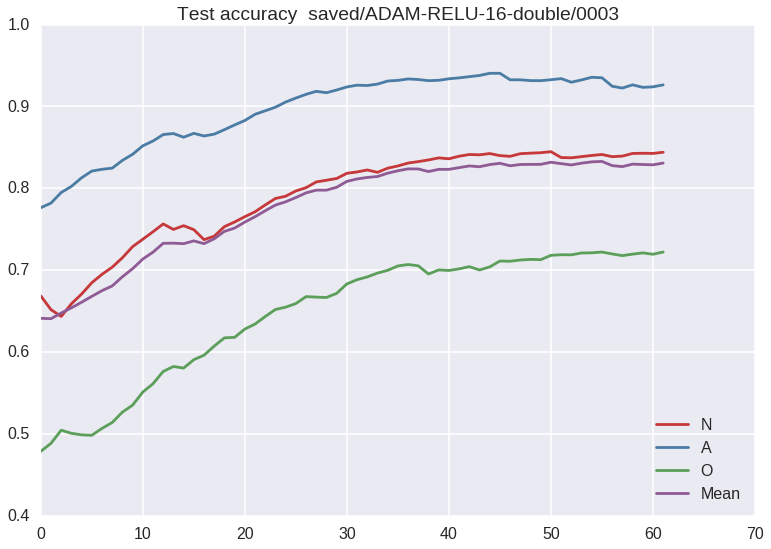

In [151]:
plot(B)
    

saved/ADAM-SELU-19-halved/0003


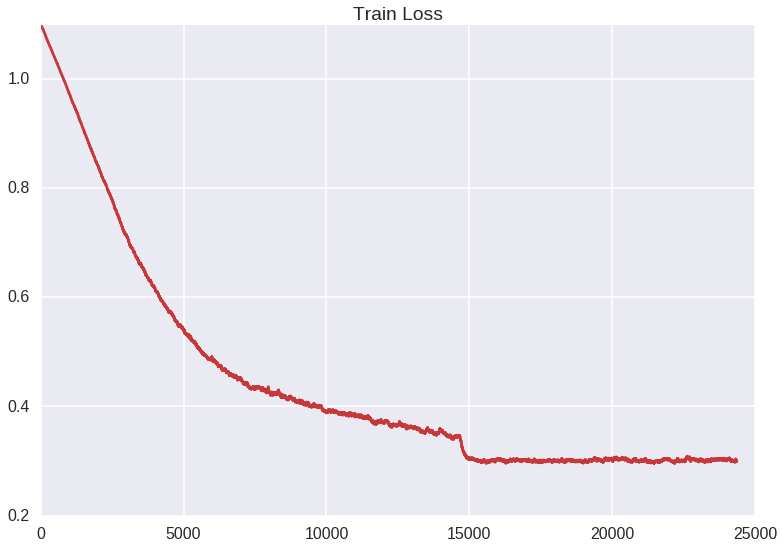

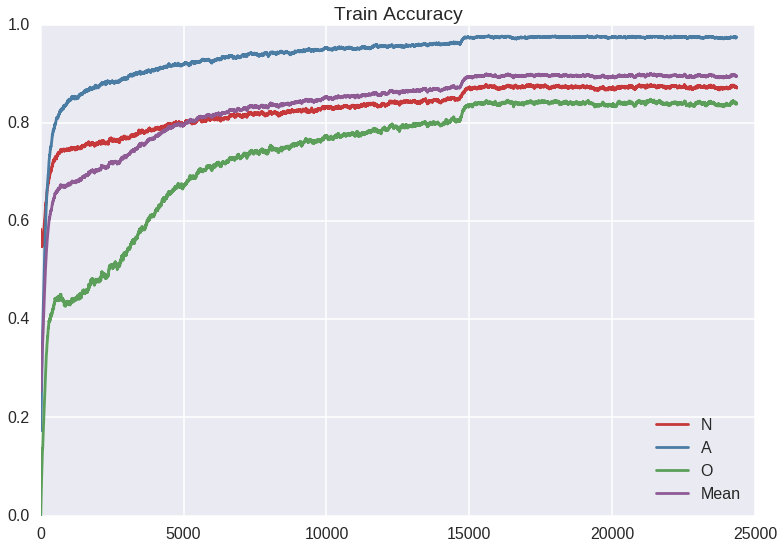

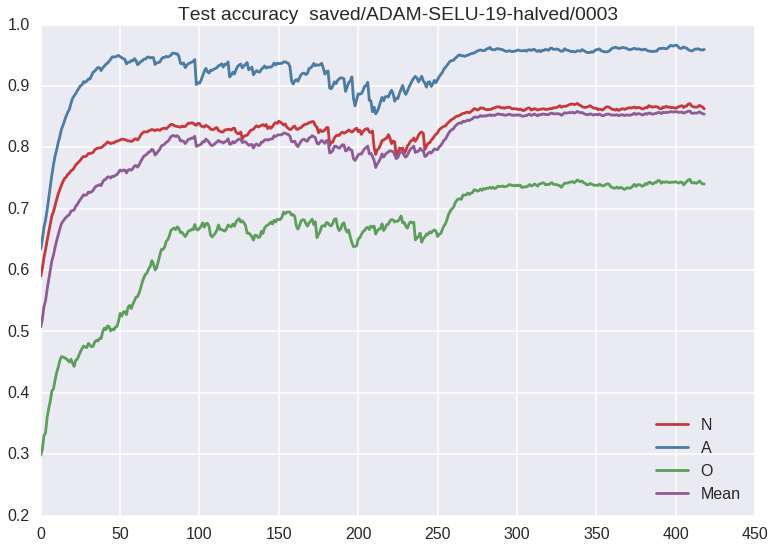

In [152]:
plot(C)
    

saved/ADAM-RELU-19-halved/0003


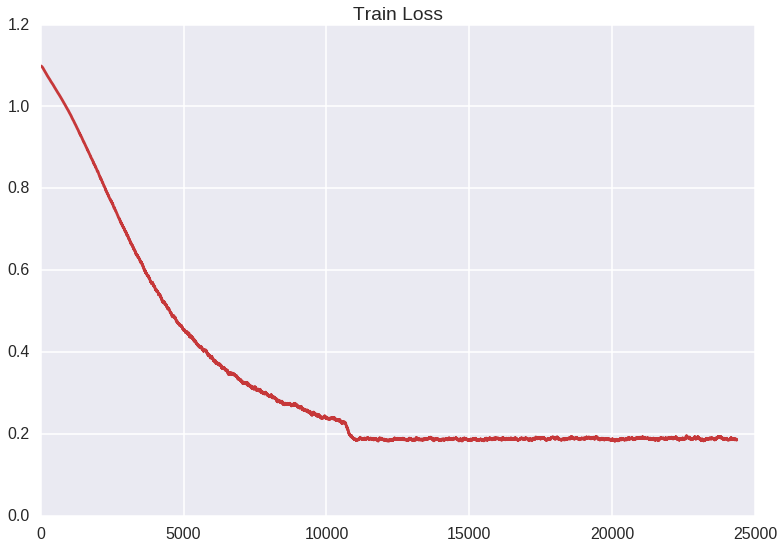

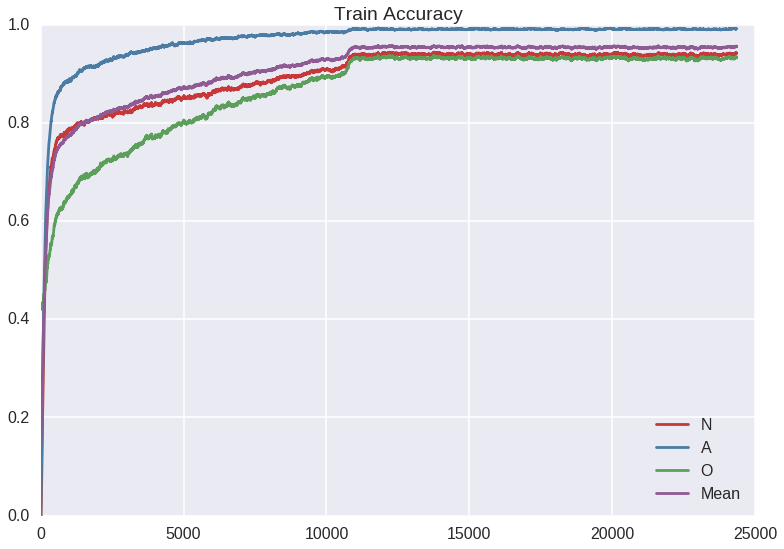

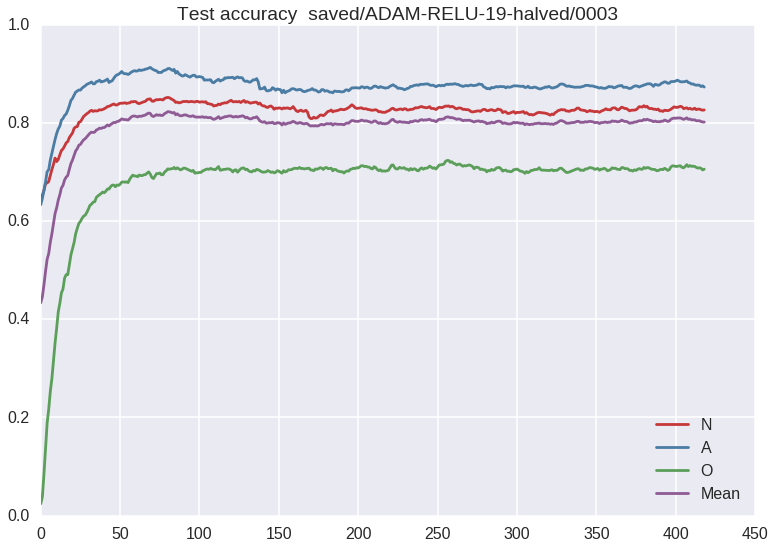

In [153]:
plot(D)
    

saved/ADAM-SELU-16-quart/0003


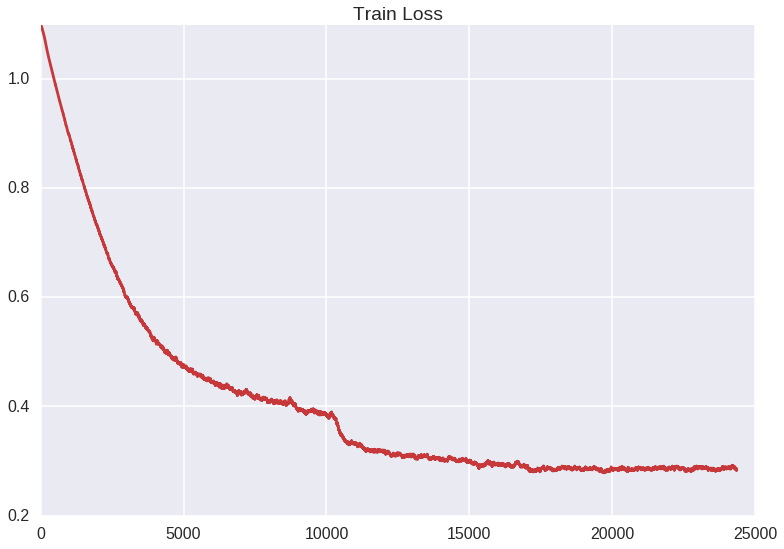

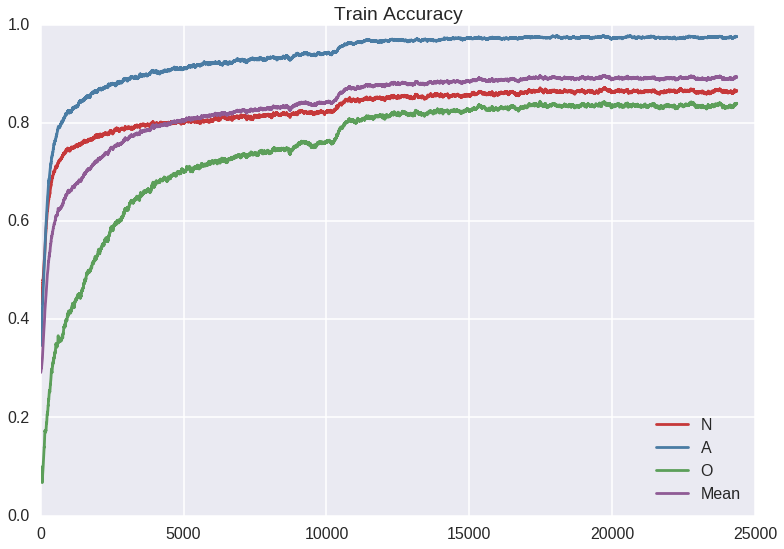

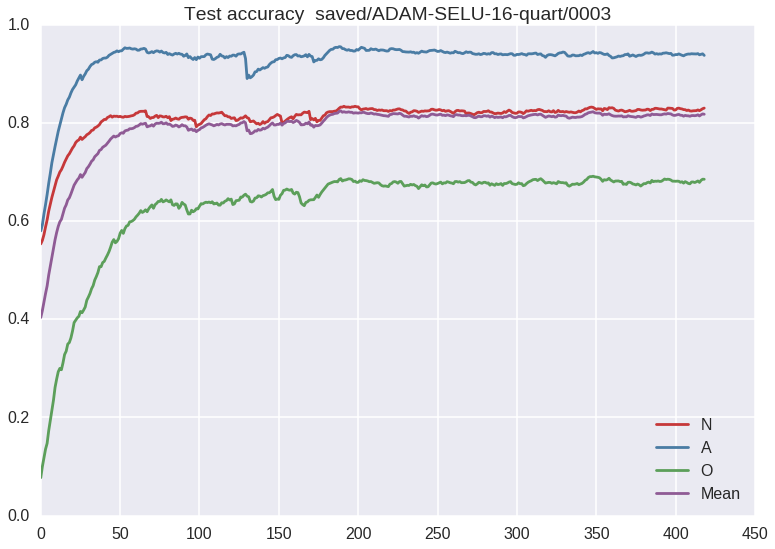

In [154]:
plot(E)
    

saved/ADAM-RELU-16-quart/0003


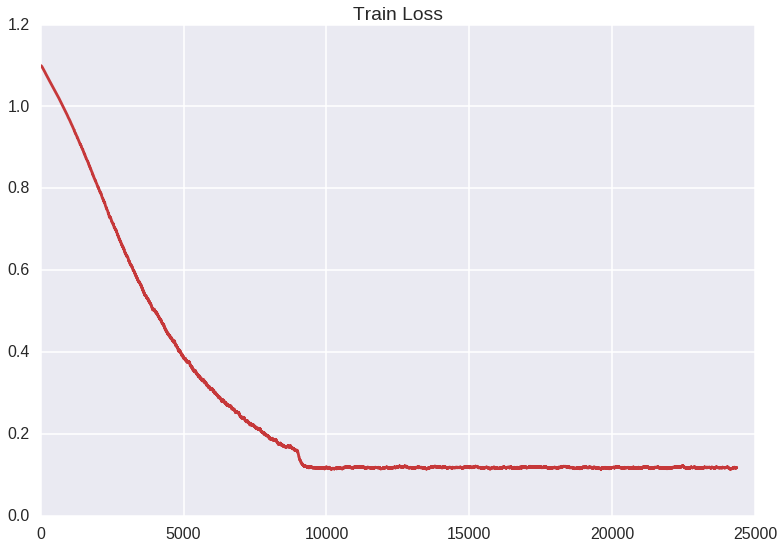

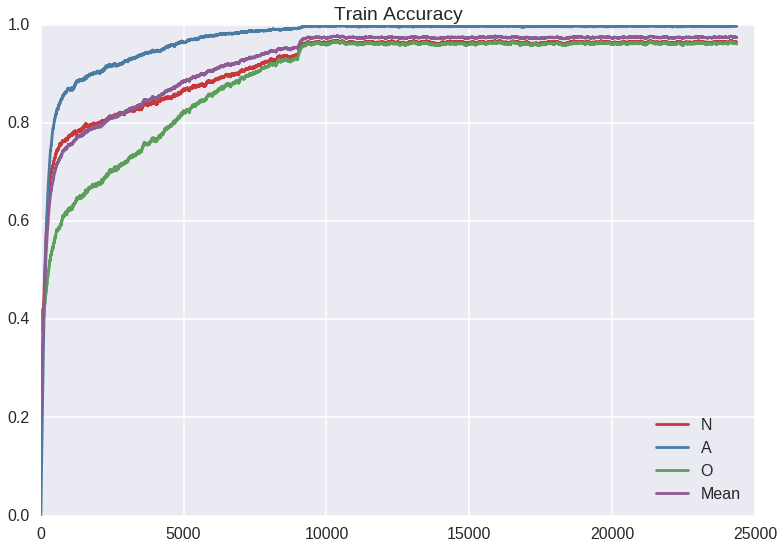

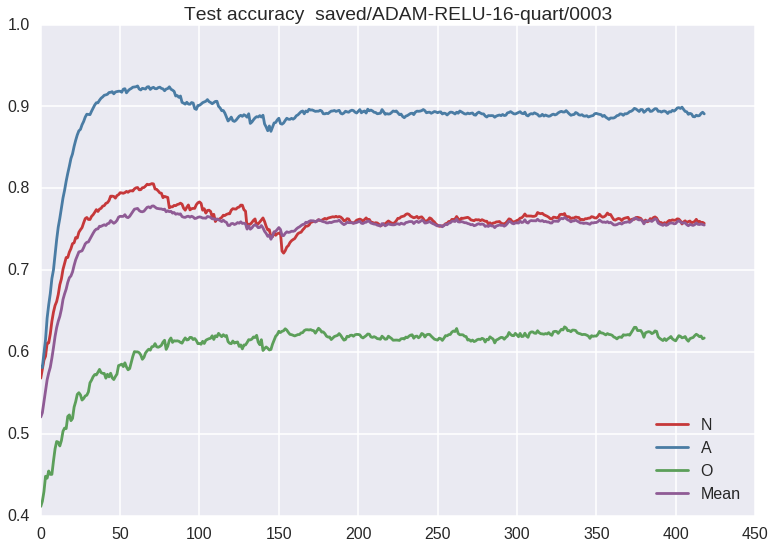

In [155]:
plot(F)
    

saved/ADAM-SELU-19/0003


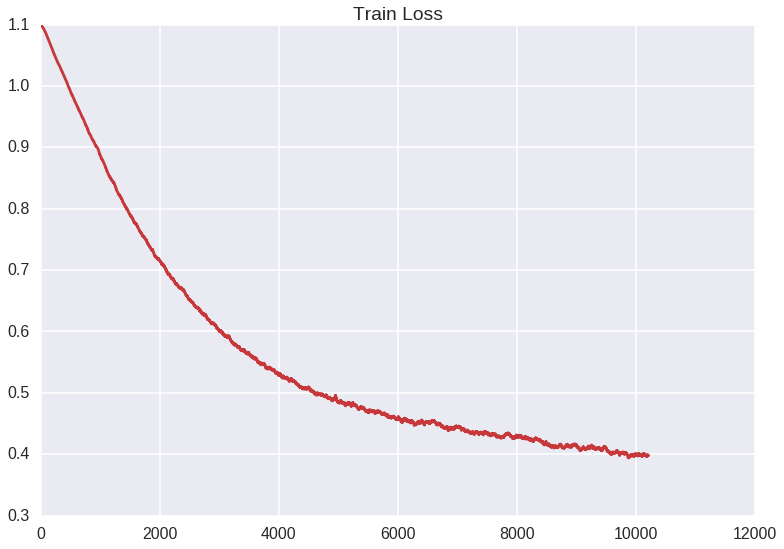

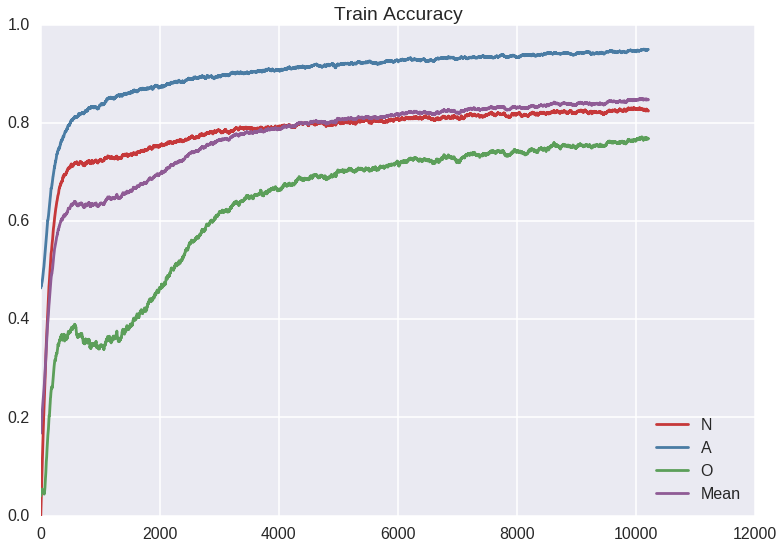

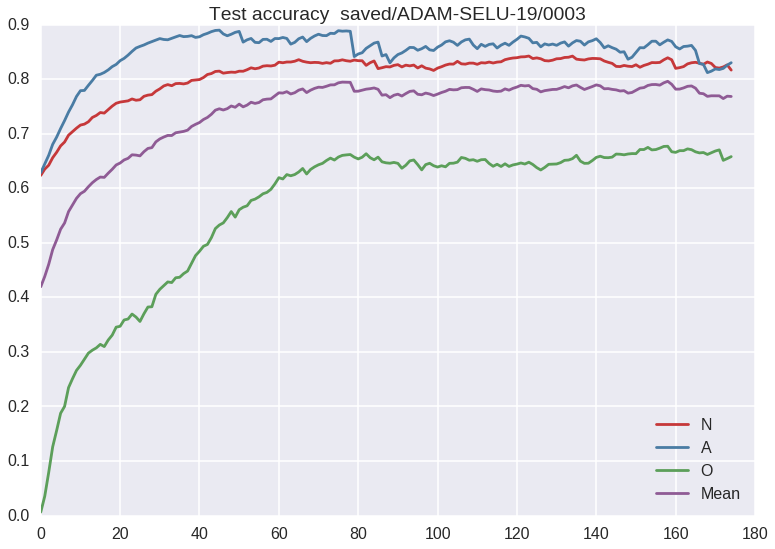

In [156]:
plot(G)
    

saved/ADAM-RELU-19/0003


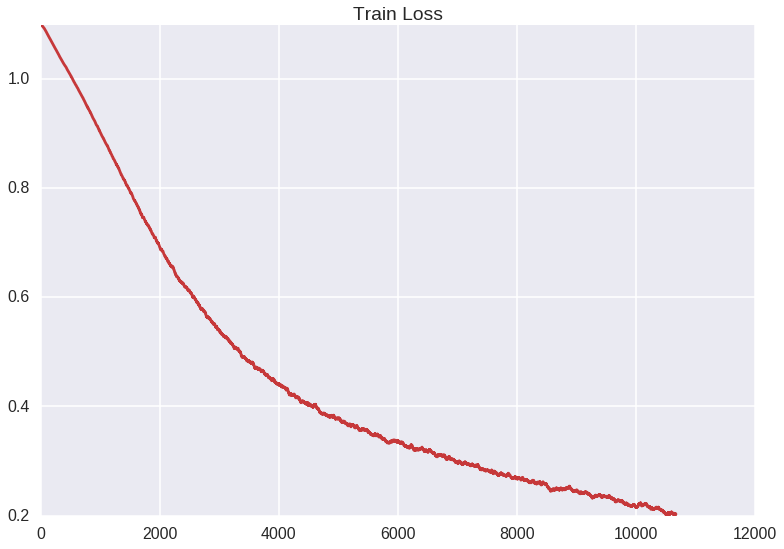

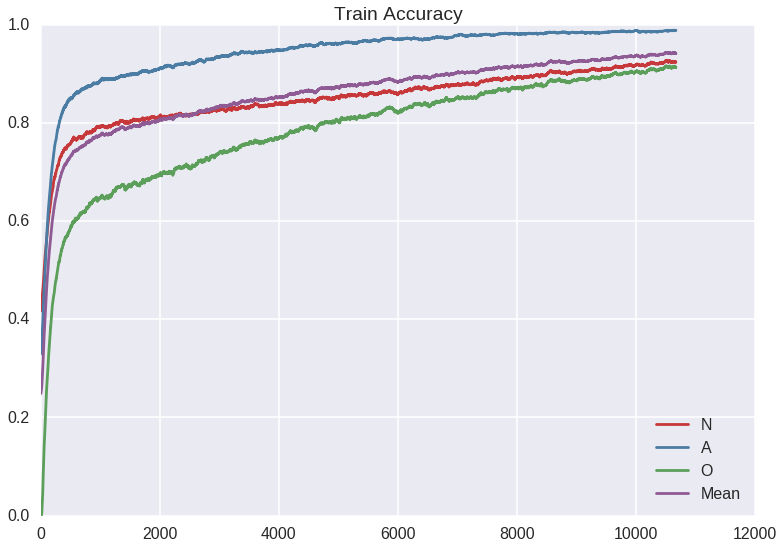

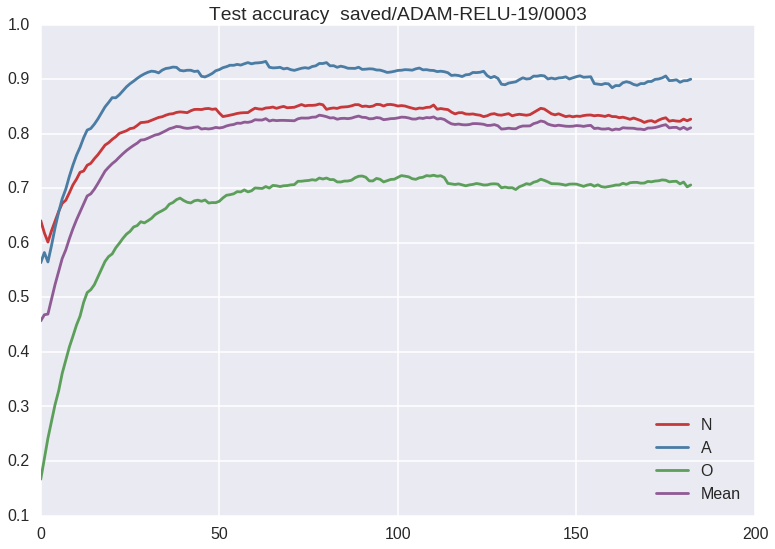

In [157]:
plot(H)
    

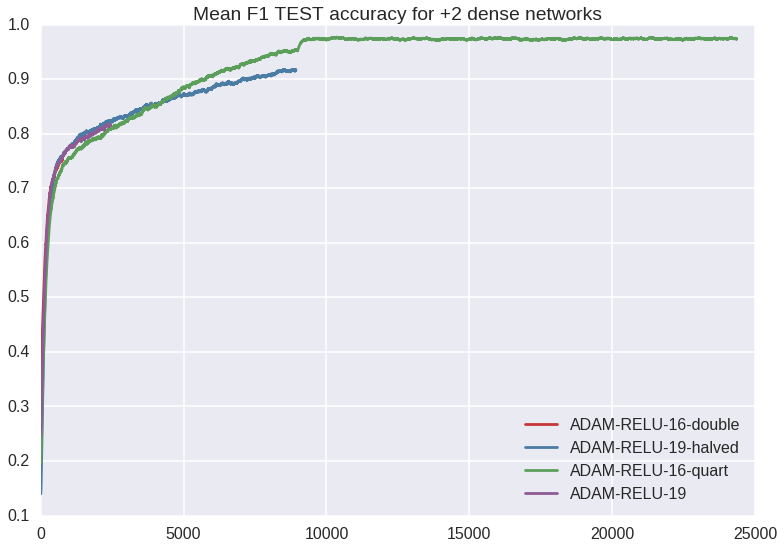

In [43]:
# plt.close()
plt.title('Mean F1 TEST accuracy for +2 dense networks')
add_plot(B)
add_plot(D)
add_plot(F)
add_plot(H)
plt.legend(loc='lower right')
plt.show()

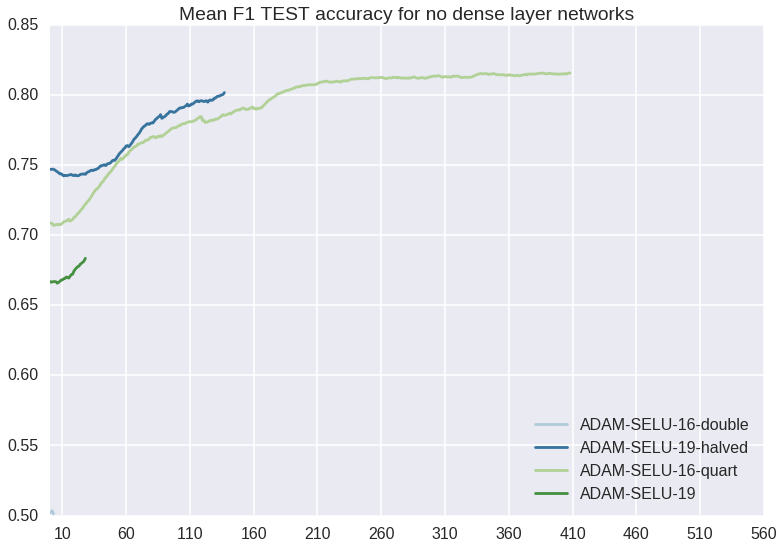

In [44]:
def add_plot(T, alpha=0.02):
    plt.plot(ema(th.cat(T.test_F1)[10:600, -1], alpha), label=T.path[6:-5])
plt.close()
plt.title('Mean F1 TEST accuracy for no dense layer networks')
add_plot(A)
add_plot(C)
add_plot(E)
add_plot(G)
plt.legend(loc='lower right')
plt.xticks(range(10, 600, 50))
plt.show()

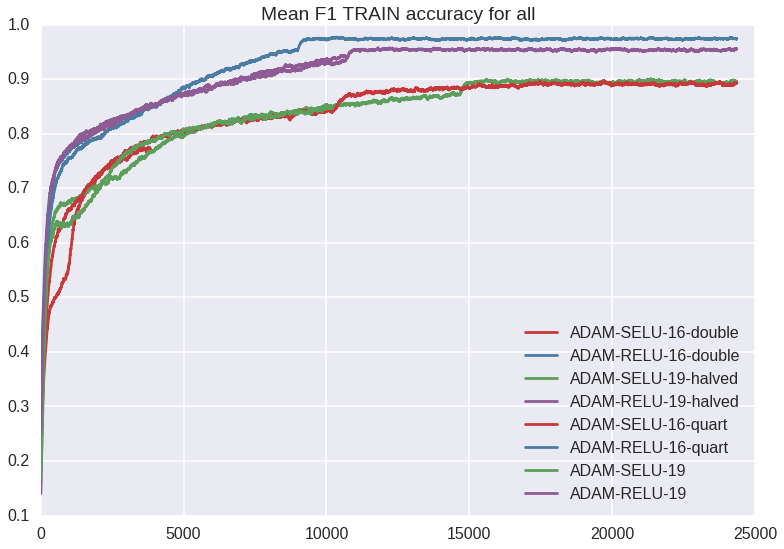

In [158]:
plt.close()
plt.title('Mean F1 TRAIN accuracy for all')
def add_plot(T, alpha=0.01):
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])

for T in A, B, C, D, E, F, G, H:
    add_plot(T)
    
plt.legend(loc='lower right')
plt.show()